In [21]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


### Non Linear Regression

* True underlying models are rarely linear

* * The linearity assumption is often "good enough", particularly in:

  * Tackling questions are just not well defined to benefit from more complex models
  
    * Always in search of better models but how much leverage but always evaluate how much more leverage a precise model is going to provide 
    
  * Quick prototype simple models that require full interpretability   

### Tell Tale or non-linearity - 1

* The model appears to be nonlinear

$$
y = 30 -0.5 x +0.005 x^2 + \epsilon
$$




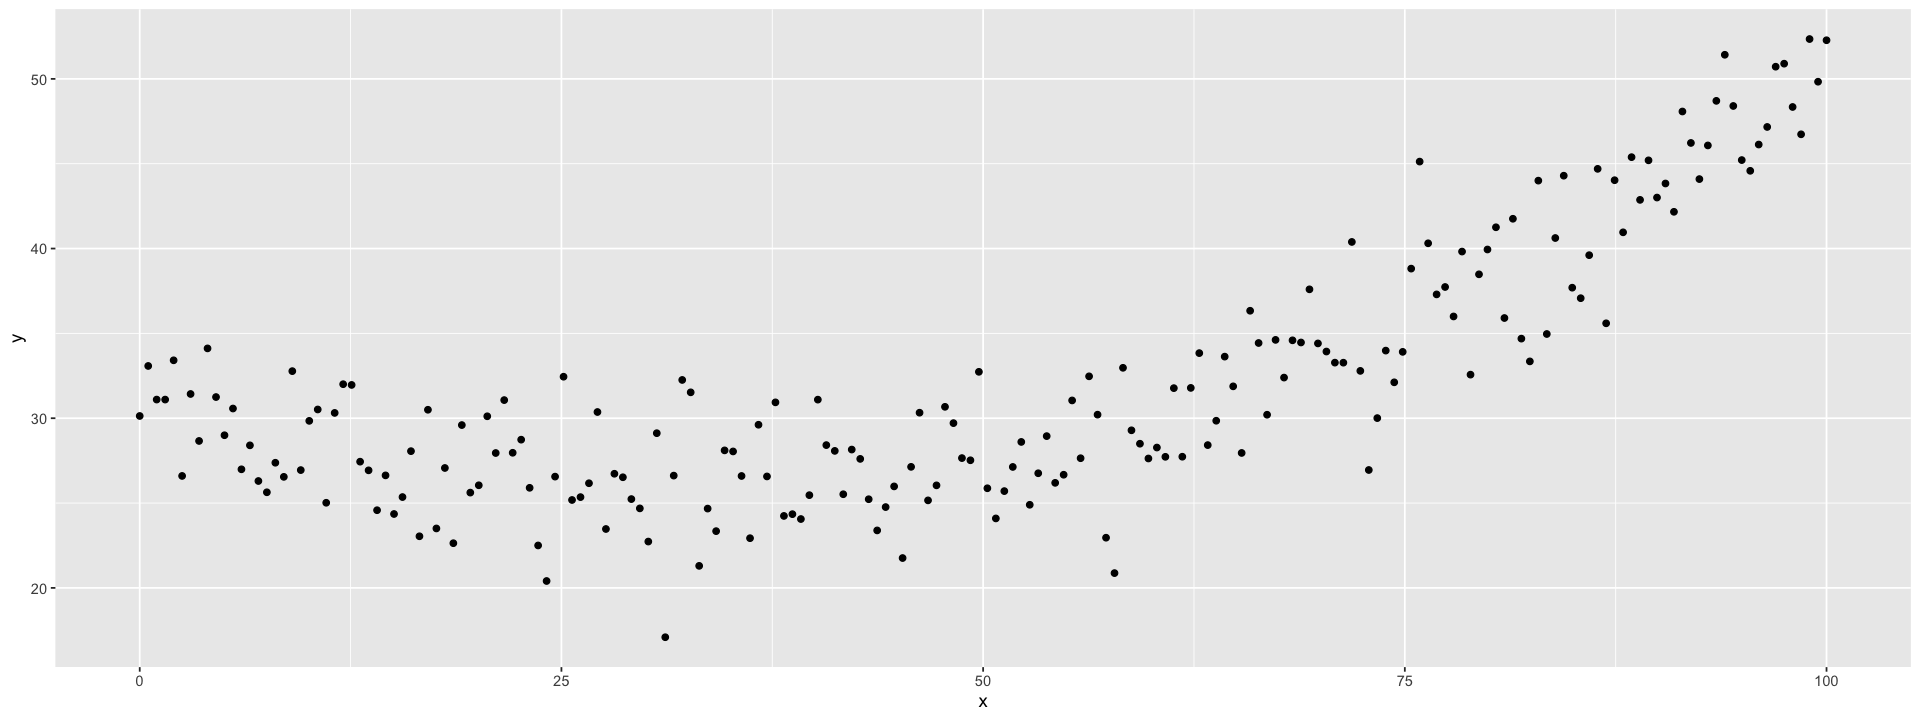

In [22]:
x = seq(0, 100, length.out = 200)
errors = rnorm(200, 0, 3)
y = 30 + (-0.3 * x)+ (0.005*x**2) +  errors

ggplot() + 
 geom_point(aes(x=x, y=y))


### TellTale of Non-linearity - 2

* Errors terms are not normally distributed
  * Recall that the assumption is that $\epsilon \sim \mathcal{N}(\mu,\sigma)$
  * Errors that contain a trend indicate a violation of the assumption

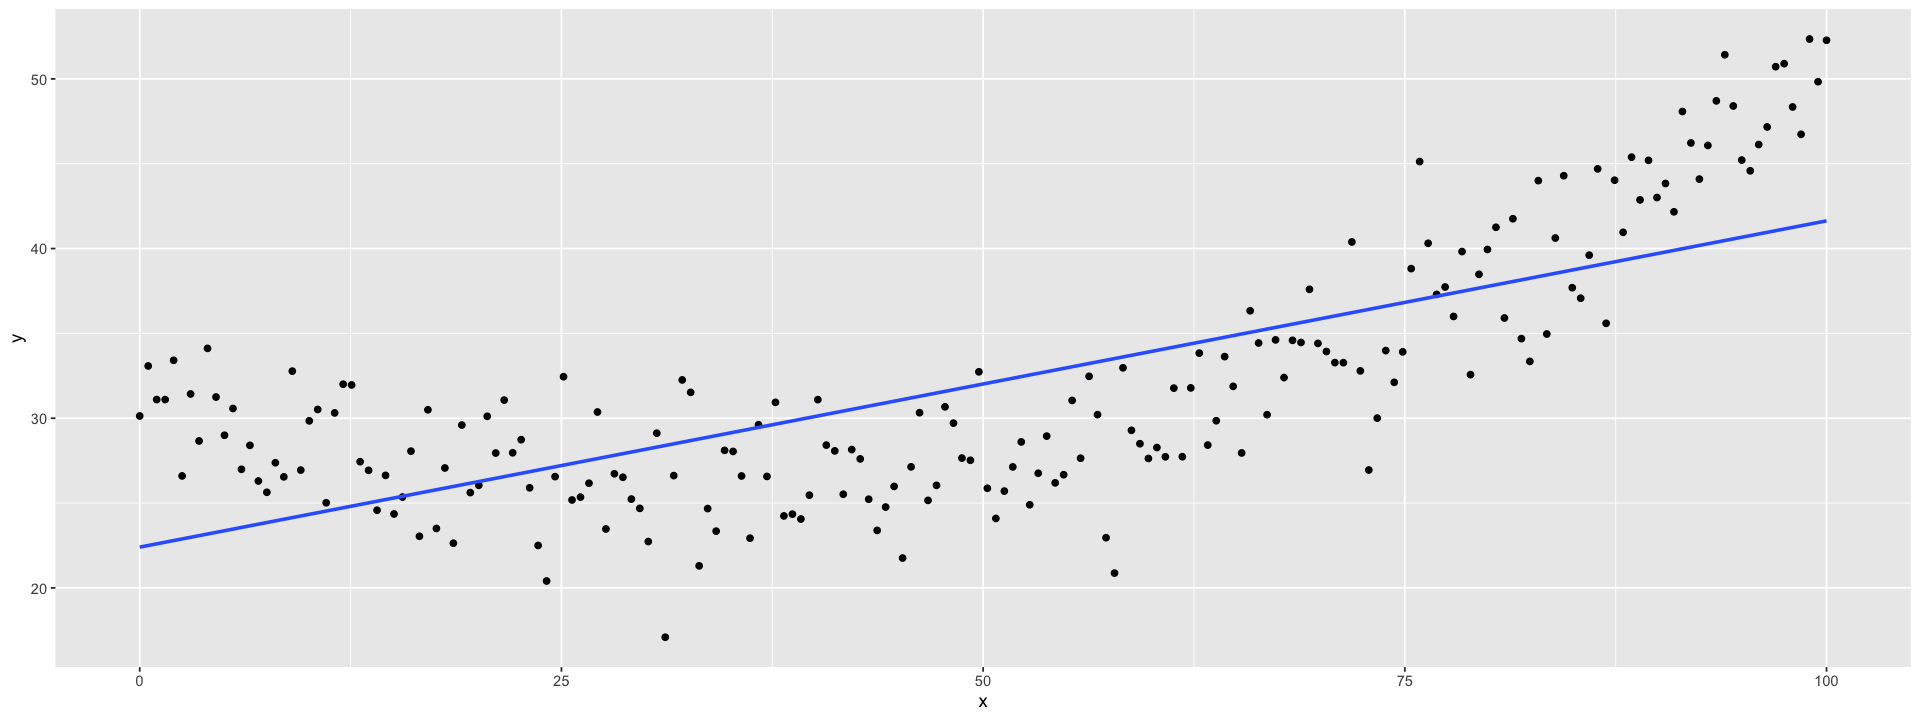

In [23]:
lm_model = lm(y~x)
ggplot() + 
 geom_point(aes(x=x, y=y)) +
 geom_smooth(aes(x,y), method = "lm", se=FALSE, formula="y~x")

preds = lm_model$coefficients["(Intercept)"] + lm_model$coefficients["x"] * x
errors = y - preds



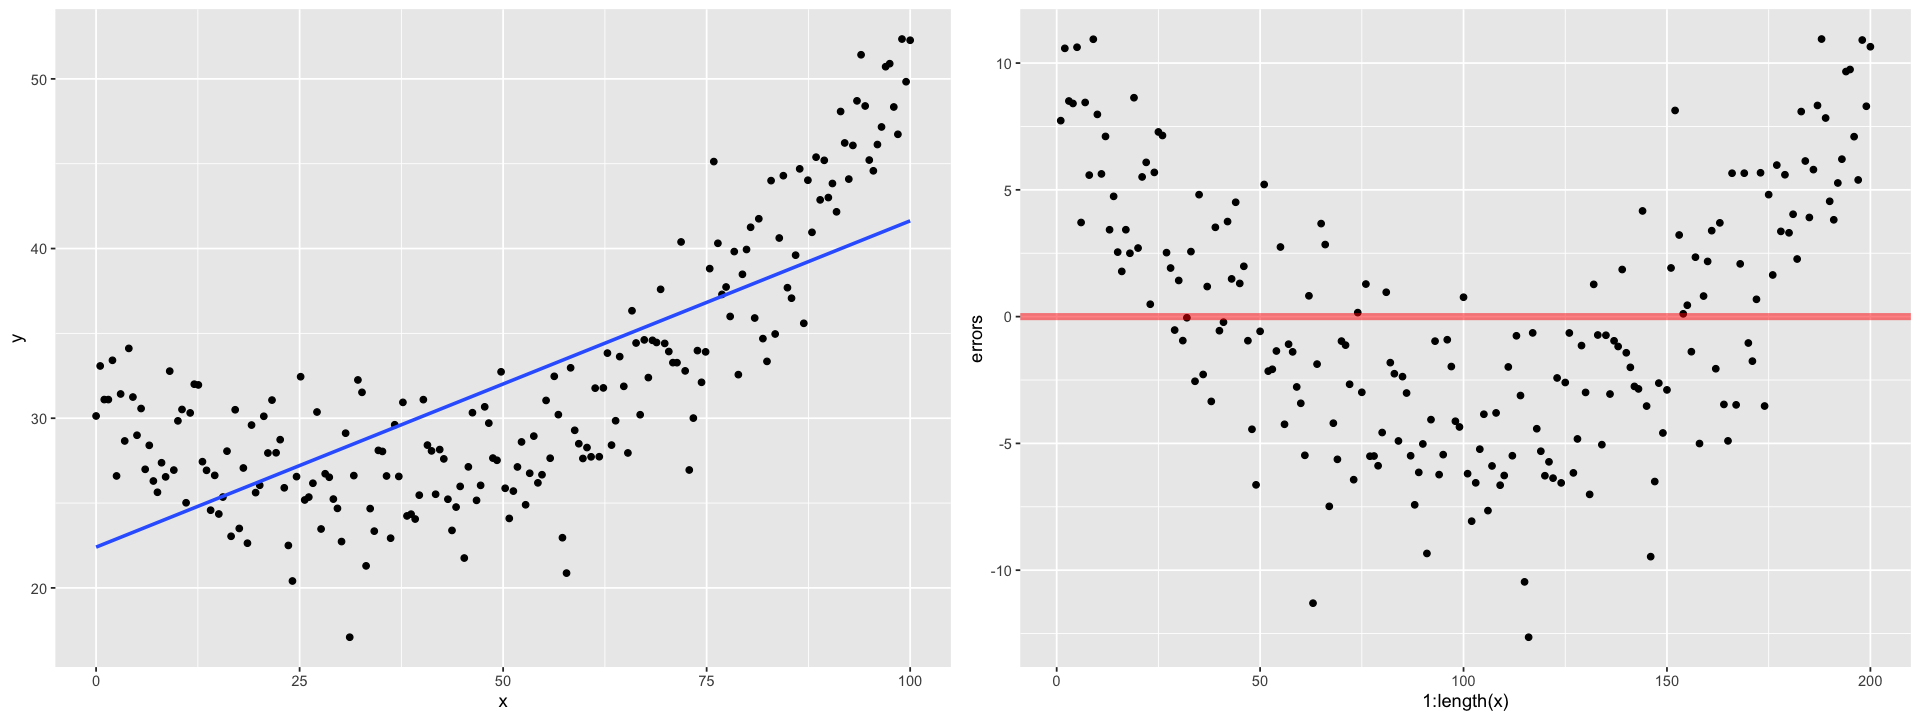

In [24]:
options(repr.plot.width=16, repr.plot.height=6)

require(gridExtra)

plot1 <- ggplot() + 
            geom_point(aes(x=x, y=y)) +
            geom_smooth(aes(x,y), method = "lm", se=FALSE, formula="y~x")

plot2 <- ggplot() + 
          geom_point(aes(x=1:length(x), y=errors)) + 
          geom_abline(slope = 0, intercept=0, color="red",alpha=0.5, size=2)

grid.arrange(plot1, plot2, ncol=2)


### Non-Linear Models

* How do we handle the case data is clearly non-linear?

* One approach might be to compute the model as the average of the points in each region

* For example, for $x=40$, we need to take 3 observed data points immediately before and after
  * say for instance we take 5 points
 
* This is called a Nearest Neighbor Regression
  * When $N$ is carefully selected and with a relatively small number of features, this approach can lead to fairly good predictions 
  * However, method is not interpretable, i.e., we don't know the contribution of the different variables in the model

In [25]:
pos = 52
print("The five positions before post 52 are:")
(pos-5): pos
print("The five positions before post 52 are:")
x[(pos-5): pos]

[1] "The five positions before post 52 are:"


[1] 47 48 49 50 51 52

[1] "The five positions before post 52 are:"


[1] 23.11558 23.61809 24.12060 24.62312 25.12563 25.62814

In [26]:
print("The five y-value before post 52 are:")

y[(pos-5): pos]

[1] "The five y-value before post 52 are:"


[1] 25.89848 22.50169 20.40672 26.55826 32.44651 25.18127

In [27]:
x_5_before_after

[1] 23.11558 23.61809 24.12060 24.62312 25.12563 25.62814 26.13065 26.63317
 [9] 27.13568 27.63819 28.14070

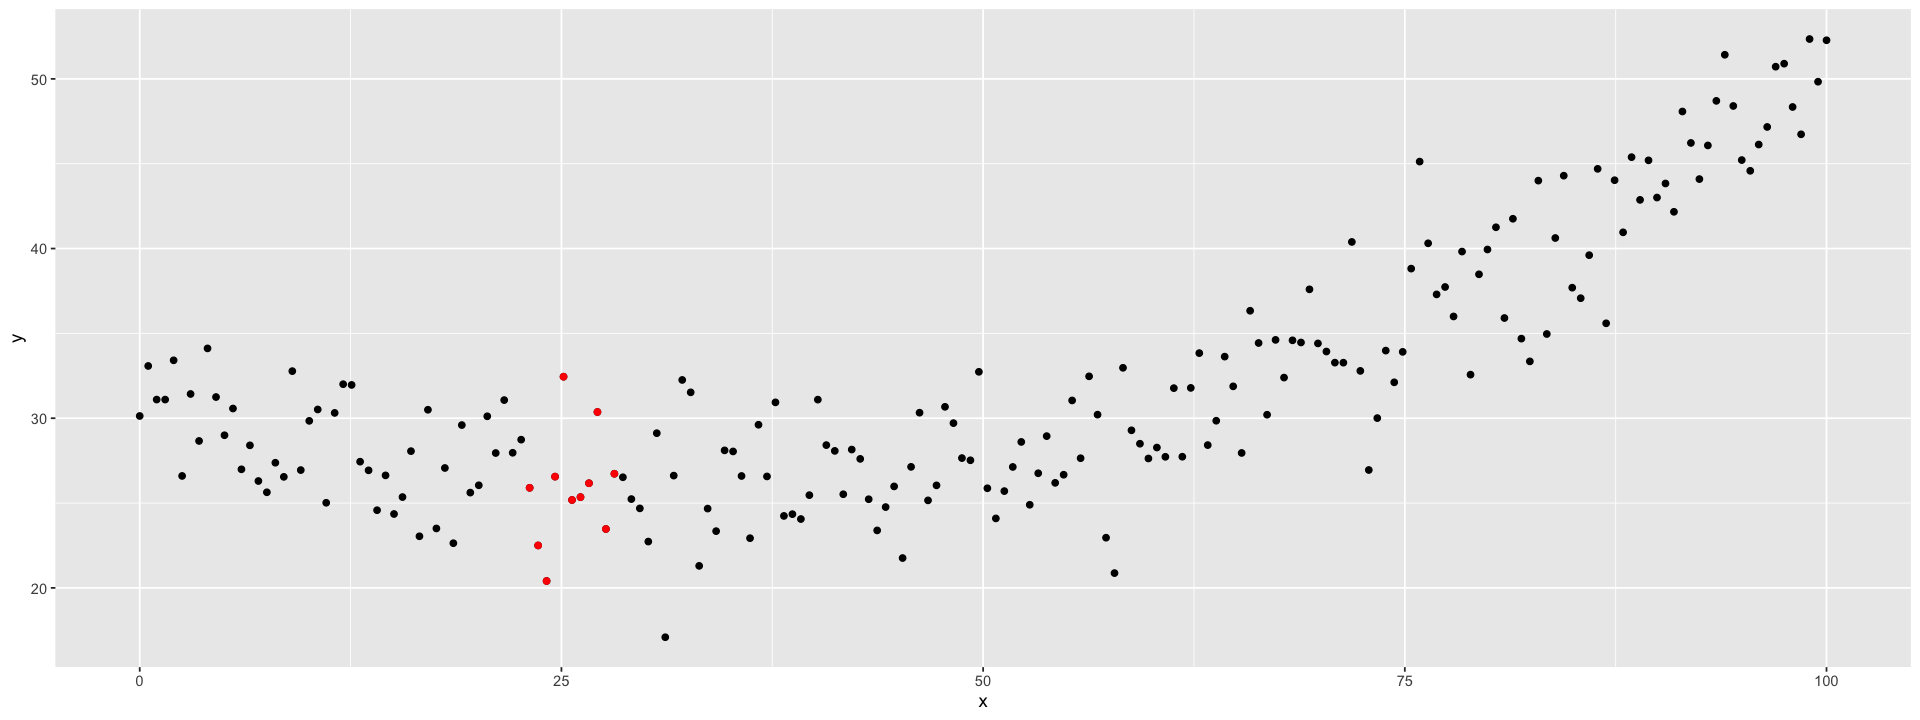

In [28]:
x_5_before_after = x[(pos-5): (pos+5)]
y_5_before_after = y[(pos-5): (pos+5)]
ggplot() + 
  geom_point(aes(x=x, y=y)) +
  geom_point(aes(x=x_5_before_after, y=y_5_before_after), color ='red') 


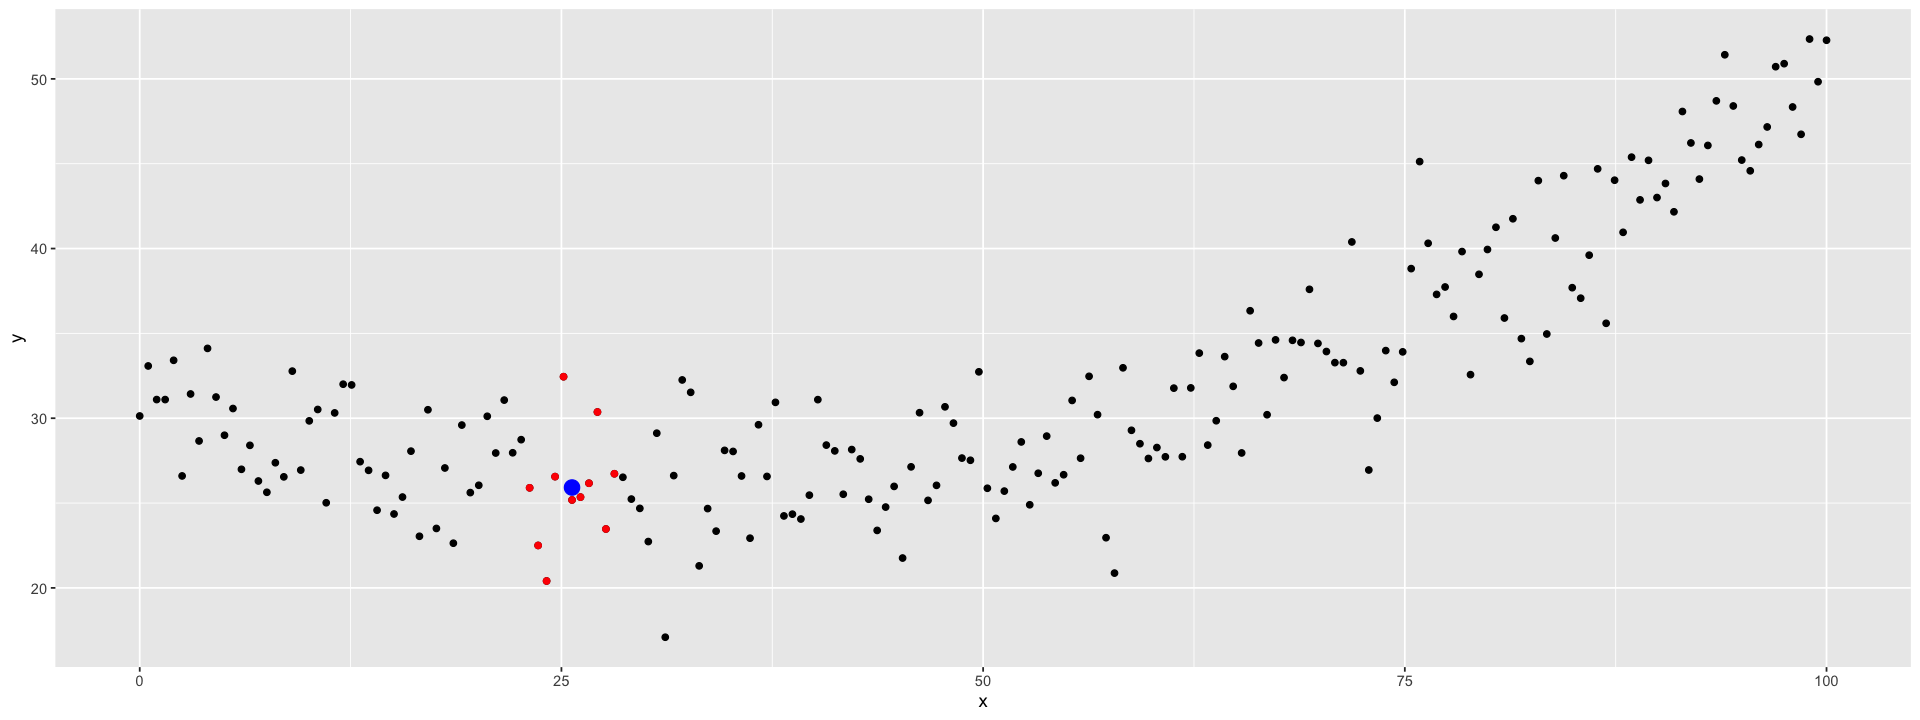

In [29]:
# find the average point for the predicted value

pos = 52
x_pos =x[pos]
y_pred_pos = mean(y[(pos-5): (pos+5)])
ggplot() + 
  geom_point(aes(x=x, y=y)) +
  geom_point(aes(x=x_5_before_after, y=y_5_before_after), color ='red') +
  geom_point(aes(x=x_pos, y=y_pred_pos), color ='blue', size=4)




In [30]:
compute_nn_avg = function(pos, step=5) {
    x_pos = x[pos]
    y_pred_pos = mean(y[(pos-step): (pos+step)])
    y_pred_pos
}    
x_positions = seq(6,195)
# Guess why I am using the indices below? 
pred_values =sapply(x_positions, compute_nn_avg)
str(pred_values)

 num [1:190] 30.9 30.9 30.4 30.1 29.7 ...


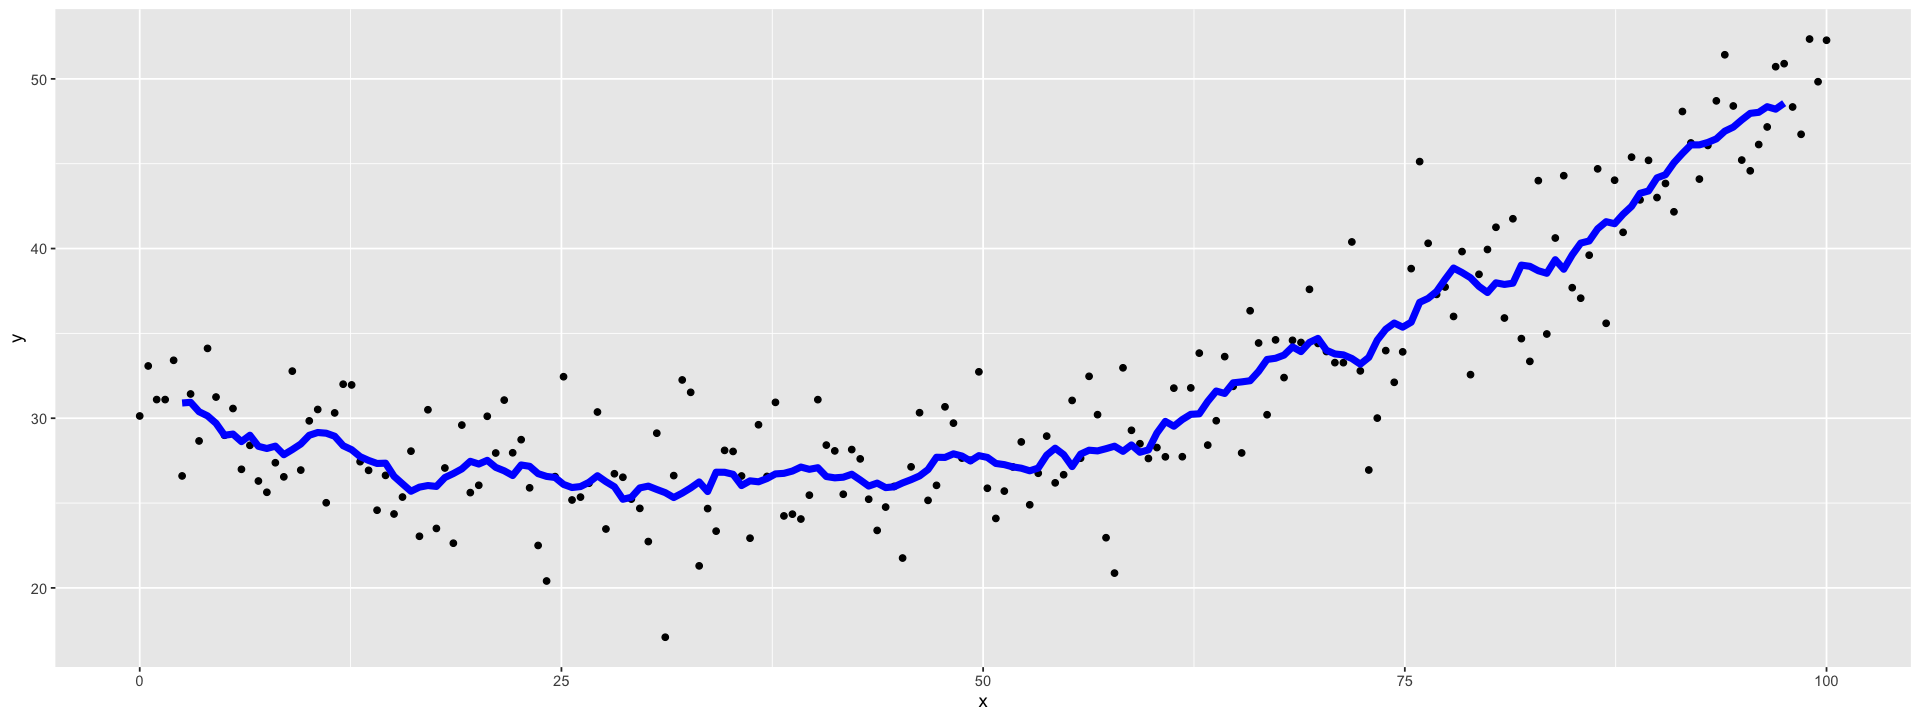

In [31]:
ggplot() + 
  geom_point(aes(x=x, y=y)) +
  geom_line(aes(x=x[6:195], y=pred_values), color ='blue', size=2)


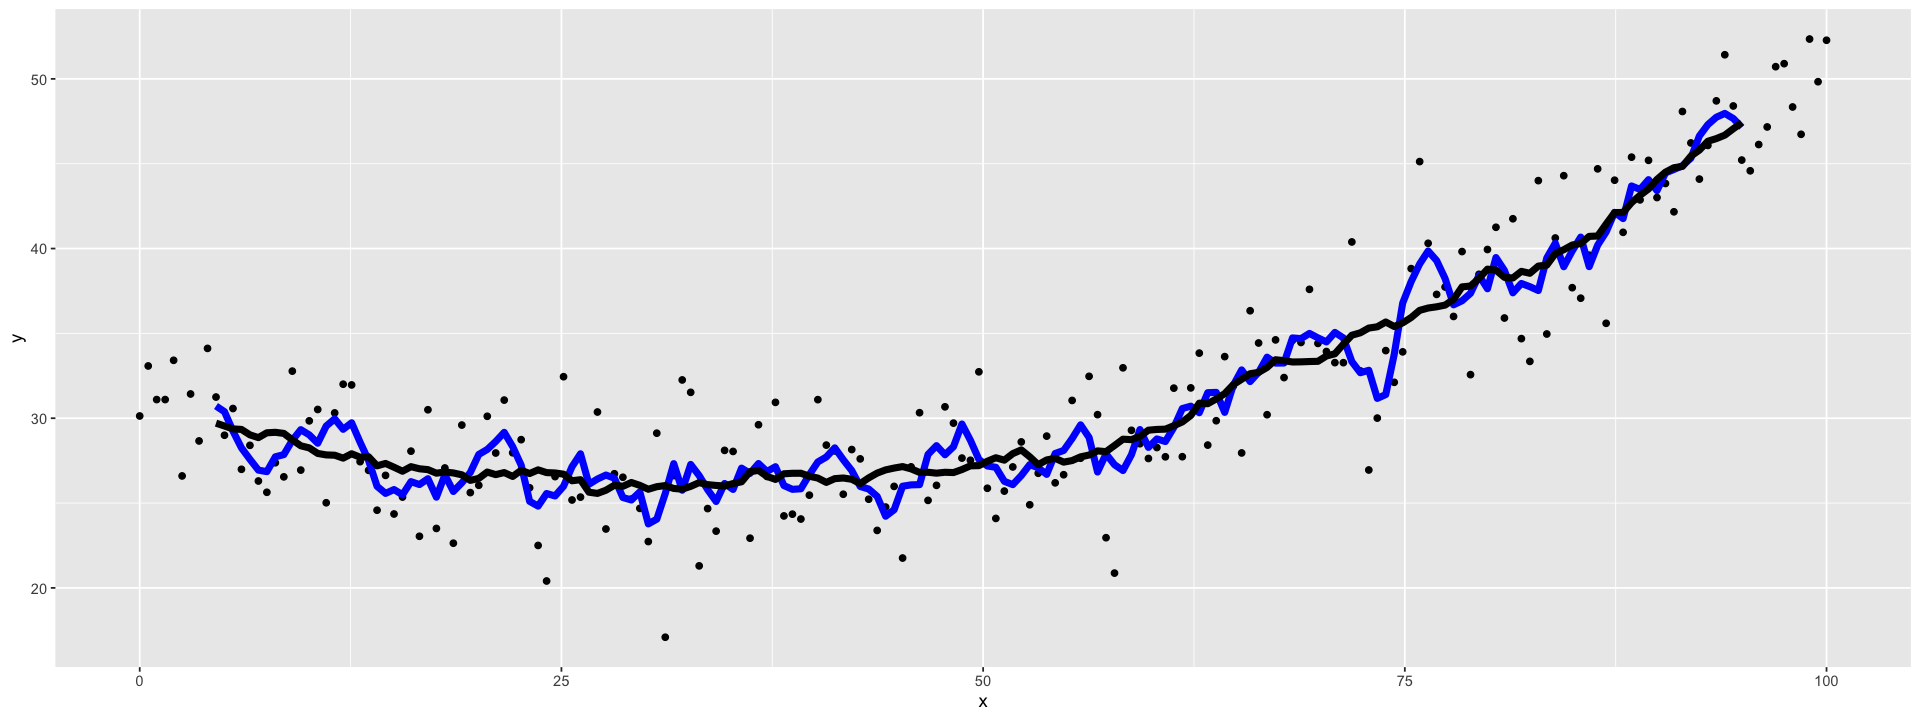

In [32]:
# Exploring Different Number of NN

x_positions = seq(10,190)
# Guess why I am using the indices below? 
pred_values_k_2 =sapply(x_positions, compute_nn_avg, 2)
pred_values_k_9 =sapply(x_positions, compute_nn_avg, 9)

ggplot() + 
  geom_point(aes(x=x, y=y)) +
  geom_line(aes(x=x[10:190], y=pred_values_k_2), color ='blue', size=2)+
  geom_line(aes(x=x[10:190], y=pred_values_k_9), color ='black', size=2)


### Problems with Nearest Neighbor Regression

* Requires finding the perfect number of nearest neighbors

* Affected by outliers

* Missing values at the extremities

* Lastly, not an interpretable model as we don't know how the different variables contribute to the outcome.

### Plynomial Regression

* Rather than model the data with a 1st-degree polynomial, we will use a higher degree polynomial 

  * Ex. second, third or even higher if needed

* A 1st-degree polynomial
$$
    y = \beta_0 + \beta_1 x
$$



* 3rd-degree polynomial 
$$ 
    y = \beta_0 ~~+~~ \beta_1 x ~~+~~ \beta_2x^2 ~~+~~ \beta_3x^3 
$$

### Using Linear Model in R

Two-step process
1. Add new feature ($A = x^2$ and $B = x^3$)
  * Those are sometimes referred to as polynomial features 
2. Fit the model using the new polynomial features
  * From the implementation point of view, this is just plain `lm` 

Transform: 
$$ 
    y = \beta_0 ~~+~~ \beta_1 x ~~+~~ \beta_2x^2 ~~+~~ \beta_3x^3 
$$
into:   
$$ 
    y = \beta_0 * 1 ~~+~~ \beta_1 \cdot A ~~+~~ \beta_2 \cdot B ~~+~~ \beta_3 \cdot C\mbox{, where  }A=x\mbox{, }B=x^2\mbox{ and }C=x^3
$$




In [33]:
set.seed(122)
x = sort(rnorm(100, 0, 2))
errors = rnorm(100, 0, 1)
y = 3 + (-0.9 * x)+ (0.4*x**2) + (0.2*x**3)  + errors



In [36]:
in_data = tibble(x=x, A=x**2, y=y)
head(in_data)

x,A,y
<dbl>,<dbl>,<dbl>
-5.035434,25.35560,-7.5954215
-4.925181,24.25741,-7.6429081
-4.306792,18.54846,-1.2577173
-4.036749,16.29534,-1.2919393
-3.755281,14.10213,3.3888653
-3.638089,13.23569,-0.2944276


In [37]:
in_data = tibble(x=x, A=x**2, y=y)

lm_model = lm(y~x+A, data=in_data)
summary(lm_model)


Call:
lm(formula = y ~ x + A, data = in_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5411  -2.1154  -0.3494   2.2306  14.6521 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.1288     0.4498   6.956 4.12e-10 ***
x             1.5187     0.1636   9.285 4.69e-15 ***
A             0.3338     0.0594   5.620 1.83e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.533 on 97 degrees of freedom
Multiple R-squared:  0.536,	Adjusted R-squared:  0.5264 
F-statistic: 56.03 on 2 and 97 DF,  p-value: < 2.2e-16


In [40]:
new_x = rnorm(10,0,3)
new_A = new_x**2

new_data = data.frame(x=new_x, A=new_A)
head(new_data)


,x,A
,<dbl>,<dbl>
1,2.1983820,4.8328835
2,2.6350260,6.9433619
3,-1.6577168,2.7480251
4,0.9637042,0.9287259
5,0.5528593,0.3056535
6,0.7624714,0.5813627


In [41]:
predict(lm_model, new_data)

1         2         3         4         5         6         7         8 
 8.080773  9.448422  1.528551  4.902387  4.070443  4.480818 24.621333  1.910000 
        9        10 
13.599421  2.902577

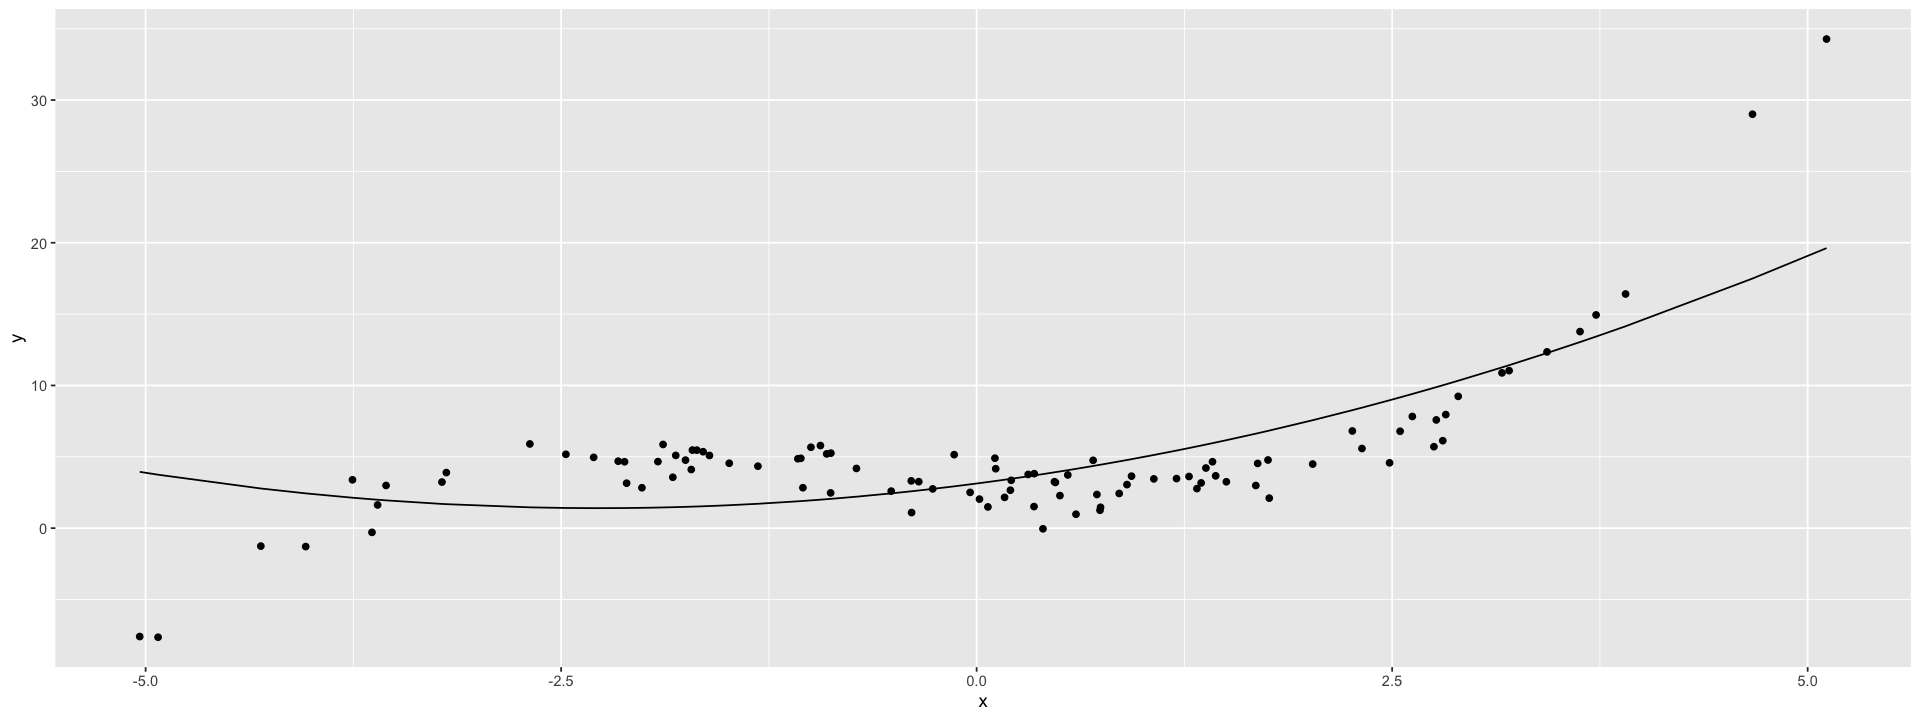

In [42]:
ggplot() +
  geom_point(aes(x, y)) +
  geom_line(aes(x,  predict(lm_model, in_data)))

### Selecting the Polynomial Degree

* The higher the polynomial, the more flexible the function and the better the fit
  * For an n^{th} degree polynomial, the function will have, at least theoretically, n-1 "inflection" points

* For a dataset n, an nth degree polynomial will fit perfectly 
    * The curve will have n-1 turning points.
    
* Thus, the higher the polynomial, the more likely we are to overfit the data
  * Oscillations are very unlikely to be characteristic of the true data
  * Fit is likely just a bias

In [43]:
lm_model_2 = lm(y ~ poly(x,2, raw = TRUE ), data=in_data)
summary(lm_model_2)


Call:
lm(formula = y ~ poly(x, 2, raw = TRUE), data = in_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5411  -2.1154  -0.3494   2.2306  14.6521 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.1288     0.4498   6.956 4.12e-10 ***
poly(x, 2, raw = TRUE)1   1.5187     0.1636   9.285 4.69e-15 ***
poly(x, 2, raw = TRUE)2   0.3338     0.0594   5.620 1.83e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.533 on 97 degrees of freedom
Multiple R-squared:  0.536,	Adjusted R-squared:  0.5264 
F-statistic: 56.03 on 2 and 97 DF,  p-value: < 2.2e-16


In [44]:
in_data = data.frame(x=x, A=x**2, B =x**3)
head(in_data)

,x,A,B
,<dbl>,<dbl>,<dbl>
1,-5.035434,25.35560,-127.67643
2,-4.925181,24.25741,-119.47210
3,-4.306792,18.54846,-79.88435
4,-4.036749,16.29534,-65.78018
5,-3.755281,14.10213,-52.95747
6,-3.638089,13.23569,-48.15261


In [45]:

lm_model_3 = lm(y ~ poly(x,3, raw=TRUE), data =in_data)
summary(lm_model_3)



Call:
lm(formula = y ~ poly(x, 3, raw = TRUE), data = in_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.86322 -0.62688  0.05973  0.69285  2.05080 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.109415   0.138616  22.432  < 2e-16 ***
poly(x, 3, raw = TRUE)1 -0.911852   0.094464  -9.653 8.28e-16 ***
poly(x, 3, raw = TRUE)2  0.377724   0.018362  20.571  < 2e-16 ***
poly(x, 3, raw = TRUE)3  0.198694   0.006531  30.422  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.089 on 96 degrees of freedom
Multiple R-squared:  0.9564,	Adjusted R-squared:  0.955 
F-statistic: 701.9 on 3 and 96 DF,  p-value: < 2.2e-16


In [46]:
lm_model_15 = lm(y ~ poly(x,15, raw=TRUE), data=in_data)
summary(lm_model_15)



Call:
lm(formula = y ~ poly(x, 15, raw = TRUE), data = in_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.65518 -0.46074  0.06424  0.64568  2.43911 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2.792e+00  2.756e-01  10.130 3.19e-16 ***
poly(x, 15, raw = TRUE)1  -1.030e+00  6.017e-01  -1.711   0.0907 .  
poly(x, 15, raw = TRUE)2   1.415e+00  7.337e-01   1.928   0.0572 .  
poly(x, 15, raw = TRUE)3   2.719e-01  8.143e-01   0.334   0.7393    
poly(x, 15, raw = TRUE)4  -5.542e-01  4.954e-01  -1.119   0.2665    
poly(x, 15, raw = TRUE)5   4.356e-02  3.790e-01   0.115   0.9088    
poly(x, 15, raw = TRUE)6   1.144e-01  1.327e-01   0.862   0.3911    
poly(x, 15, raw = TRUE)7  -2.357e-02  8.023e-02  -0.294   0.7697    
poly(x, 15, raw = TRUE)8  -1.109e-02  1.710e-02  -0.649   0.5183    
poly(x, 15, raw = TRUE)9   3.754e-03  8.749e-03   0.429   0.6690    
poly(x, 15, raw = TRUE)10  5.342e-04  1.125e-03   0.475  

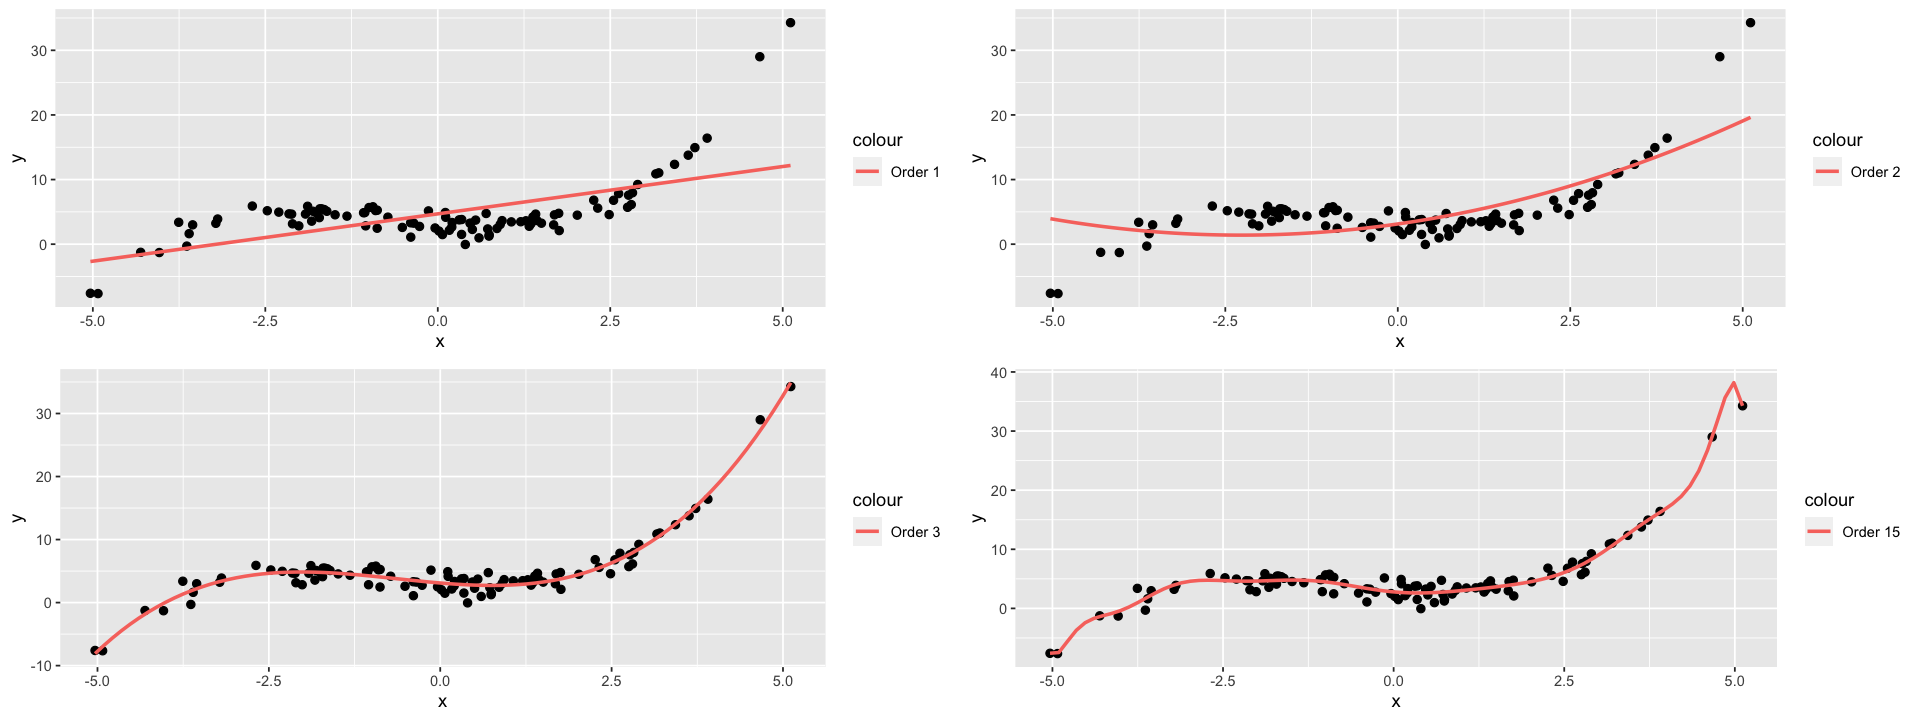

In [47]:
plt_1 = ggplot(in_data) +
  geom_point(aes(x, y), cex = 2) +
  stat_smooth(method = "lm", formula = y~poly(x,1), aes(x, lm_model$fitted.values, col = "Order 1"), se=FALSE)

plt_2 = ggplot(in_data) +
  geom_point(aes(x, y), cex = 2) +
  stat_smooth(method = "lm", formula = y~poly(x,2), aes(x, lm_model_2$fitted.values, col = "Order 2"), se=FALSE)


plt_3 = ggplot(in_data) +
  geom_point(aes(x, y), cex = 2) +
  stat_smooth(method = "lm", formula = y~poly(x,3), aes(x, lm_model_3$fitted.values, col = "Order 3"), se=FALSE)

plt_15 = ggplot(in_data) +
  geom_point(aes(x, y), cex = 2) +
  stat_smooth(method = "lm", formula = y~poly(x,15), aes(x, lm_model_15$fitted.values, col = "Order 15"), se=FALSE) 


grid.arrange(plt_1, plt_2, plt_3, plt_15, ncol=2)


### Estimating the Model Error

* Recall that complex models tend to overfit the data. 
 * This results in a difference between the training and the test errors
 * the training phase is the one concerned with finding the model parameters
 * The test error is the average error that results from using a
statistical learning method to predict the response to a new
observation, one that was not used in training the method.

### Model Complexity vs. Error
* Training error rate often is quite different from the test error rate
  * Training error can dramatically underestimate the testing error
![](https://www.dropbox.com/s/1ce6p1o6v2hja4w/test_set_performance.png?dl=1)


### Estimate Model Error - Training-Testing Split

* Best solution: a large designated test set. 

  * Often not available
* Some methods make a mathematical adjustment to the training error rate in order to estimate the test error rate.
  * These include for instance the AIC we introduced a few weeks back 

* A very popular approach estimates the test error by holding out a subset of the training observations from the fitting process 
  * Applies the model on the training data to those held out observation

### Model Complexity vs. Error

* * The training error rate is often quite different from the test error rate
  * Training error can dramatically underestimate the testing error
  
![](https://www.dropbox.com/s/1ce6p1o6v2hja4w/test_set_performance.png?dl=1)

In [48]:
test = data.frame(a=c("a1", "a2","a3","a4"), b=c("b1","b2","b3","b4"))
test

a,b
<chr>,<chr>
a1,b1
a2,b2
a3,b3
a4,b4


In [49]:
test  = test %>% mutate(id= row_number())
test

a,b,id
<chr>,<chr>,<int>
a1,b1,1
a2,b2,2
a3,b3,3
a4,b4,4


In [50]:
# Want to change the column order
test[, c(3,1,2)]

id,a,b
<int>,<chr>,<chr>
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [51]:
test = test[, c(3,1,2)]

In [52]:
data_test <- test %>% slice_sample(n = 2)
data_test

id,a,b
<int>,<chr>,<chr>
4,a4,b4
2,a2,b2


In [53]:
data_train <-test %>% slice(-pull(data_test,id))
data_train

id,a,b
<int>,<chr>,<chr>
1,a1,b1
3,a3,b3


In [54]:
in_data = in_data %>% mutate(id = row_number())
head(in_data, n = 3)

,x,A,B,id
,<dbl>,<dbl>,<dbl>,<int>
1,-5.035434,25.35560,-127.67643,1
2,-4.925181,24.25741,-119.47210,2
3,-4.306792,18.54846,-79.88435,3


In [55]:
# another way of doing it:

test_data <- test %>% sample_frac(0.5)
test_data

id,a,b
<int>,<chr>,<chr>
3,a3,b3
2,a2,b2


In [56]:
train_data <-test %>% slice(-pull(test_data,id))
train_data

id,a,b
<int>,<chr>,<chr>
1,a1,b1
4,a4,b4


In [67]:
# regenerate the data
set.seed(122)
x = sort(rnorm(100, 0, 2))
errors = rnorm(100, 0, 1)
y = 3 + (-0.9 * x)+ (0.4*x**2) + (0.2*x**3)  + errors

in_data = tibble(x=x, y=y)
in_data = in_data %>%  mutate(id= row_number())
head(in_data)

x,y,id
<dbl>,<dbl>,<int>
-5.035434,-7.5954215,1
-4.925181,-7.6429081,2
-4.306792,-1.2577173,3
-4.036749,-1.2919393,4
-3.755281,3.3888653,5
-3.638089,-0.2944276,6


In [68]:
# generate the train test split

test_data <- in_data %>% sample_frac(0.5)
train_data <-in_data %>% slice(-pull(test_data, id))


In [69]:
nrow(train_data)

[1] 50

In [70]:
nrow(test_data)

[1] 50

In [74]:
lm_model_degree = lm(y ~ poly(x, 1, raw=TRUE), data=train_data)
summary(lm_model_degree)


Call:
lm(formula = y ~ poly(x, 1, raw = TRUE), data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-5.871 -3.519 -1.355  2.381 20.509 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.9327     0.7041   7.006 7.20e-09 ***
poly(x, 1, raw = TRUE)   1.7276     0.2986   5.785 5.33e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.925 on 48 degrees of freedom
Multiple R-squared:  0.4108,	Adjusted R-squared:  0.3985 
F-statistic: 33.47 on 1 and 48 DF,  p-value: 5.329e-07


In [79]:
predict(lm_model_degree, test_data)


1          2          3          4          5          6          7 
 4.0447391  9.9384711  7.9613124 -0.6250148  6.2206321  6.4956314  5.6221304 
         8          9         10         11         12         13         14 
 5.0497859  4.6991821  1.2069302  0.2885863  1.9064568  6.7745543  7.3843090 
        15         16         17         18         19         20         21 
 6.1436591  7.8345461  5.5315732  4.4761949  2.0892948  5.1227151  2.0246890 
        22         23         24         25         26         27         28 
 6.1828723  7.8540673  4.2531767  4.9622873  7.4172918 10.8618288 -1.5549483 
        29         30         31         32         33         34         35 
 9.7104286  1.2729048 11.6782517  4.2563098  9.8092843  7.5283252 11.2046905 
        36         37         38         39         40         41         42 
 2.3610804  3.6833865  3.4149253 11.3715537  7.3159404  1.4535200  1.6731696 
        43         44         45         46         47         48         49 
10.4674509  8.8381332 10.3934642  2.6591557  7.2663619  5.5291175  3.1052617 
        50 
 5.2924312

In [81]:
test_data$y

[1]  2.59436381  9.23586723  4.77600645  3.22968058  1.46206146  3.05262433
 [7] -0.04490261  1.48738487  5.14981633  4.69235285  5.90105534  4.76662087
[13]  3.45287711  4.65488603  4.75286506  2.98779670  3.81819075  2.75033243
[19]  5.35692389  4.90301366  5.46800265  2.35968109  4.53674579  3.31273599
[25]  2.03457184  3.66527967 12.35164819  3.38886530  7.58463064  4.65261939
[31] 16.40960522  1.09231117  7.95764296  3.25024790 13.77369260  4.54842155
[37]  4.18409474  2.46946889 14.94142459  4.21367979  2.83197643  5.86604293
[43] 11.03757845  6.80906813 10.88140514  4.34238620  3.16949465  1.51103896
[49]  4.89344734  3.35209580

In [110]:
compute_error_pol_feature = function(degree){
    lm_model_degree = lm(y ~ poly(x, degree, raw=TRUE), data=train_data)
    predictions = predict(lm_model_degree, test_data)
    sum((predictions - test_data$y)^2)
}
compute_error_pol_feature(1)

[1] 479.0097

In [111]:

mse_for_degrees = sapply(2:10, compute_error_pol_feature)

In [112]:
mse_for_degrees

[1] 396.29433  66.07437  75.32095  76.05228  85.48444  83.64910  79.87273
[8]  91.85021 162.57918

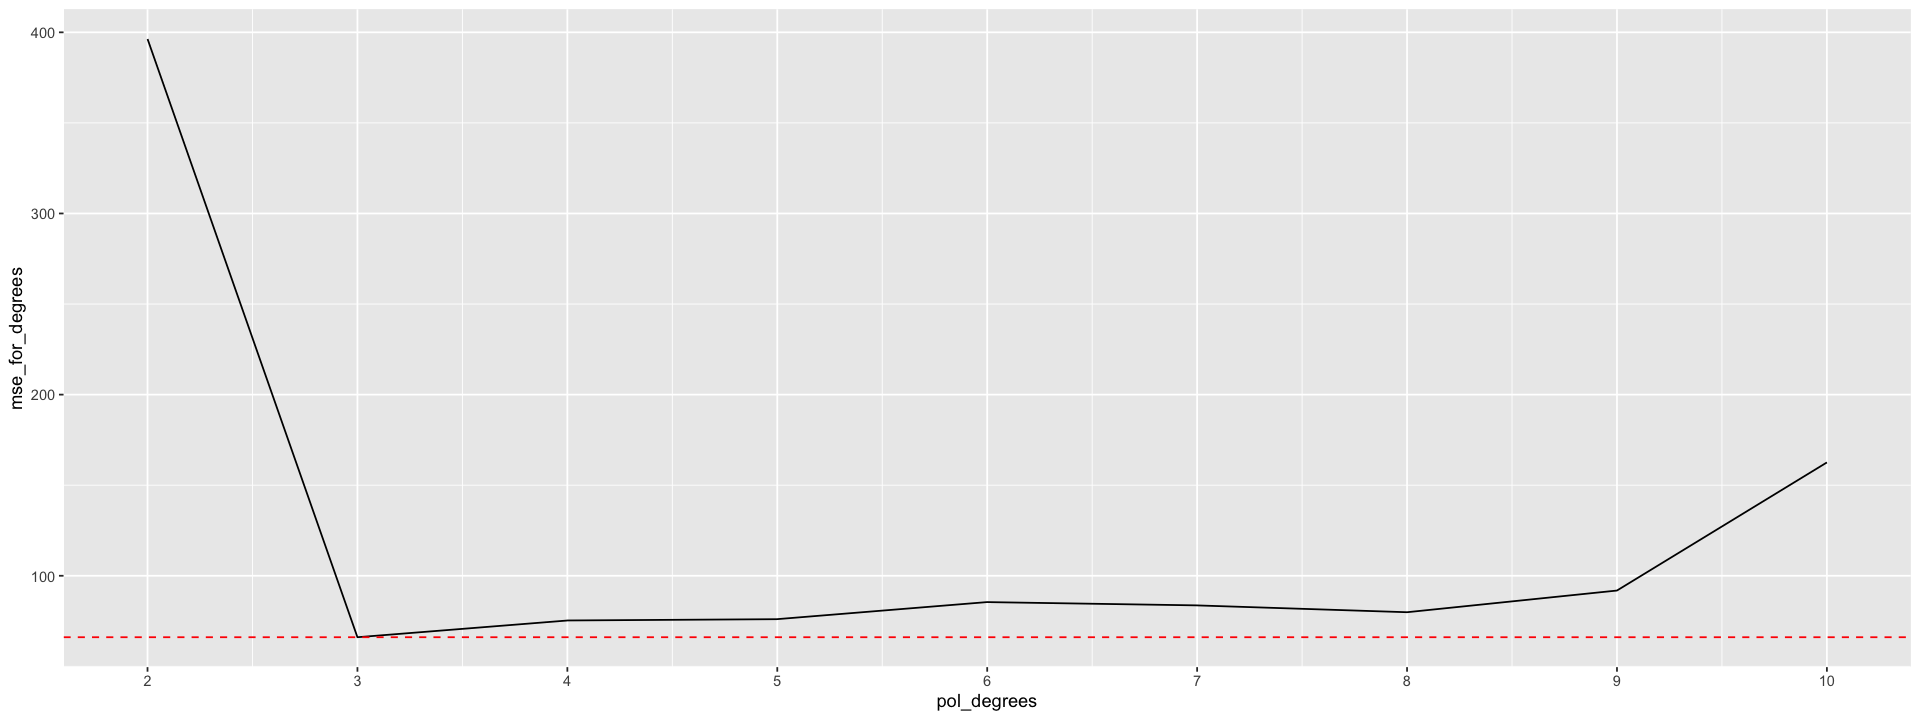

In [113]:
pol_degrees = c(2:10)
ggplot()+
  geom_line(aes(x=pol_degrees, y=mse_for_degrees))+
  scale_x_continuous(breaks=pol_degrees) + 
  geom_hline(yintercept=min(mse_for_degrees), linetype="dashed", color = "red")

 ### Train-Test Error Estimation

* Convenient and often used approach but has shortcomings

  * Using the training-test estimation of the error can be highly variable
    * Depends on precisely which observations are included in the training set and which observations are included in the validation set.
  * Validation approach uses only a subset of the observations 
  * Wasted a large portion of the data on testing 
    * Complex problems need more data to be fitted. 
    * Cannot test with a smaller sample or we risk overfitting         

In [379]:
# Testing with insufficient data can lead to erroneous conclusions

test_data <- in_data %>% sample_frac(0.2)
train_data <-in_data %>% slice(-pull(test_data,id))

sapply(1:20, compute_error_pol_feature)

[1] 24.98175 19.44450 21.23706 21.30545 20.93815 21.49560 21.54244 22.19466
 [9] 21.28197 21.21128 21.04633 21.12004 21.60834 21.31080 21.34299 21.48293
[17] 21.74521 22.64148 21.48240 20.68400

### Estimate Model Error -- K-fold Cross-Validation

* Widely used approach for estimating test error.
* Estimates typically used to select best model
  * Also to give an idea of the test error of the final chosen model
* Strategy: 
  * Divide the data into K equal-sized chunks. 
  * leave out part k, fit the model to the other K −1 parts (combined), and then obtain predictions for the left-out kth part.
  * Do in turn for each part k = 1,2,...K, 
  * Combine, using, for instance, mean the results from the K chunks

[Example application of cross-validation in ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6392493/)

![](https://www.dropbox.com/s/g45dzmekwffchml/cross_validation_1.png?dl=1)

### K-fold Cross-Validation - Cont'd
* Test subset in blue
* Training subsets in red
![](https://www.dropbox.com/s/c66rdmkazqpvvu6/cross_validation_2.png?dl=1)

### About Linear Model Interpretability

* Linear models are interpretable and often show good predictive performance.
* When the number of predictors is large, interpreting the model becomes "cumbersome"
* An approach to tackle this issue is by using dimensionality reduction


1. Project the p predictors into an M-dimensional subspace, where M < p. 
2. use the M projections as predictors to fit a linear regression model by least squares

### About Linear Model Interpretability

* Subset Selection: Use forward or backward selection to identify the features that provides the best fit.

* Shrinkage: We fit a model involving all p predictors (covered in the future)
  * Shrink the estimated coefficients towards zero
    * Also known as regularization 
  * Indirectly perform variable selection



### Subset Selection Revisited

* In the presence of multiple variables, which one do we select to model an outcome.

  *Unlike polynomial features, we cannot include all variables and simply drop those that have statistically insignificant $p$-values

* Given a dataset with p features, we can select the best subset to model a dataset using the following algorithm:

2. For k = 1,2,...p:

(a) Fit all ${p \choose k}$ models that contain exactly $k$ predictors.


(b) Pick the best among these models 

  * Here, best is defined as having the smallest RSS.

